In [81]:
import pandas as pd
titanic_df = pd.read_csv('titanic3.csv')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [82]:
titanic_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## 0819 과제 : 전처리로 정확도 높이기

In [ ]:
- 결측값 처리
- 불필요 컬럼 제거('body','ticket','cabin','home.dest','name')
- 파생변수 생성

In [83]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [84]:
titanic_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [85]:
titanic_df.loc[titanic_df.age.isnull()==True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN


In [89]:
name_null =titanic_df.loc[titanic_df.age.isnull()==True].name.unique()
name_null

array(['Baumann, Mr. John D',
       'Bradley, Mr. George ("George Arthur Brayton")',
       'Brewe, Dr. Arthur Jackson', 'Cairns, Mr. Alexander',
       'Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)',
       'Chibnall, Mrs. (Edith Martha Bowerman)',
       'Chisholm, Mr. Roderick Robert Crispin',
       'Clifford, Mr. George Quincy', 'Crafton, Mr. John Bertram',
       'Farthing, Mr. John', 'Flegenheim, Mrs. Alfred (Antoinette)',
       'Fleming, Miss. Margaret', 'Franklin, Mr. Thomas Parham',
       'Frauenthal, Mrs. Henry William (Clara Heinsheimer)',
       'Fry, Mr. Richard', 'Goldenberg, Mrs. Samuel L (Edwiga Grabowska)',
       'Harrington, Mr. Charles H', 'Hawksford, Mr. Walter James',
       'Hilliard, Mr. Herbert Henry', 'Hoyt, Mr. William Fisher',
       'Kenyon, Mrs. Frederick R (Marion)', 'Klaber, Mr. Herman',
       'Lewy, Mr. Ervin G', 'Marechal, Mr. Pierre',
       'Meyer, Mrs. Edgar Joseph (Leila Saks)',
       'Omont, Mr. Alfred Fernand', 'Parr, Mr. Wil

In [ ]:
Mr.
Mrs.
Dr.
Miss.
Master.

In [31]:
titanic_df.drop(columns=['home.dest','body','ticket','cabin'],axis=1,inplace=True)

In [34]:
titanic_df.drop(columns=['name'],axis=1,inplace=True)

In [65]:
titanic_df.drop(columns=['boat'],axis=1,inplace=True)

In [66]:
titanic_df

,pclass,survived,sex,age,Age_category,sibsp,parch,fare,embarked
0,1,1,female,29.00,20.0,0,0,211.3375,S
1,1,1,male,0.92,0.0,1,2,151.5500,S
2,1,0,female,2.00,0.0,1,2,151.5500,S
3,1,0,male,30.00,30.0,1,2,151.5500,S
4,1,0,female,25.00,20.0,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.50,10.0,1,0,14.4542,C
1305,3,0,female,NaN,NaN,1,0,14.4542,C
1306,3,0,male,26.50,20.0,0,0,7.2250,C
1307,3,0,male,27.00,20.0,0,0,7.2250,C


### 성별에 따른 생존 여부 비교

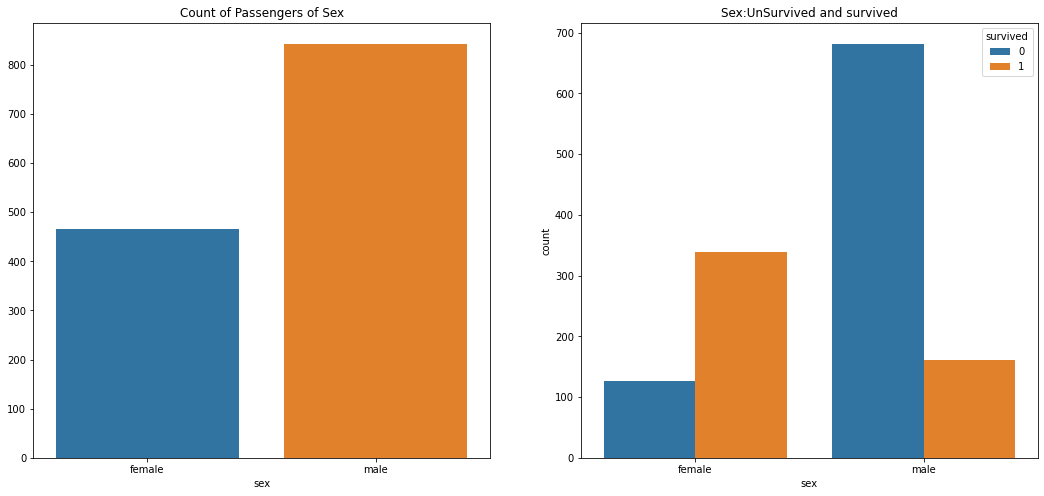

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.countplot('sex', data = titanic_df, ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot('sex', hue = 'survived', data = titanic_df, ax=ax[1])
ax[1].set_title('Sex:UnSurvived and survived')
plt.show()

- 남성이 더 많이 탑승, 여성 생존확률 높음

### 객실 요금에 따른 생존 비교

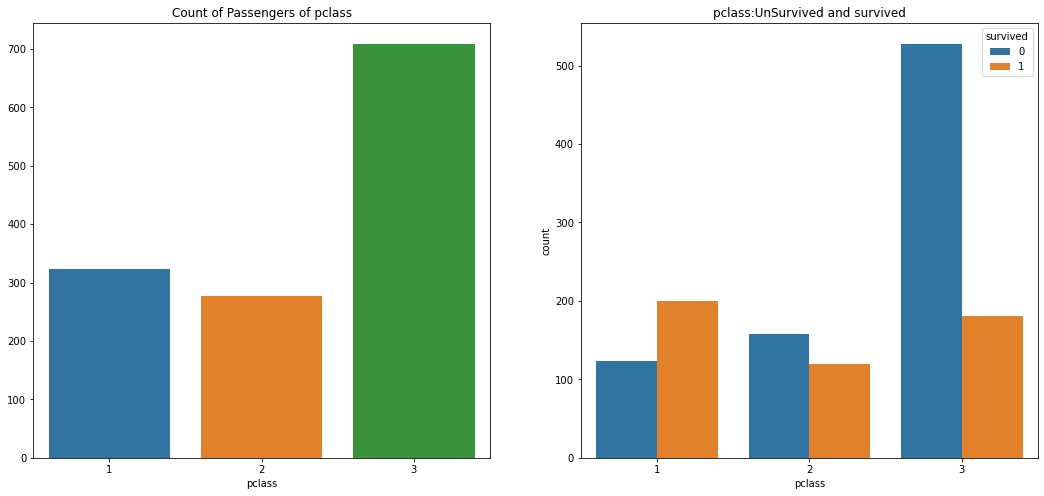

In [42]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.countplot('pclass', data = titanic_df, ax=ax[0])
ax[0].set_title('Count of Passengers of pclass')
ax[0].set_ylabel('')

sns.countplot('pclass', hue = 'survived', data = titanic_df, ax=ax[1])
ax[1].set_title('pclass:UnSurvived and survived')
plt.show()

#### 객실 별 , 연령대별 생존 확률

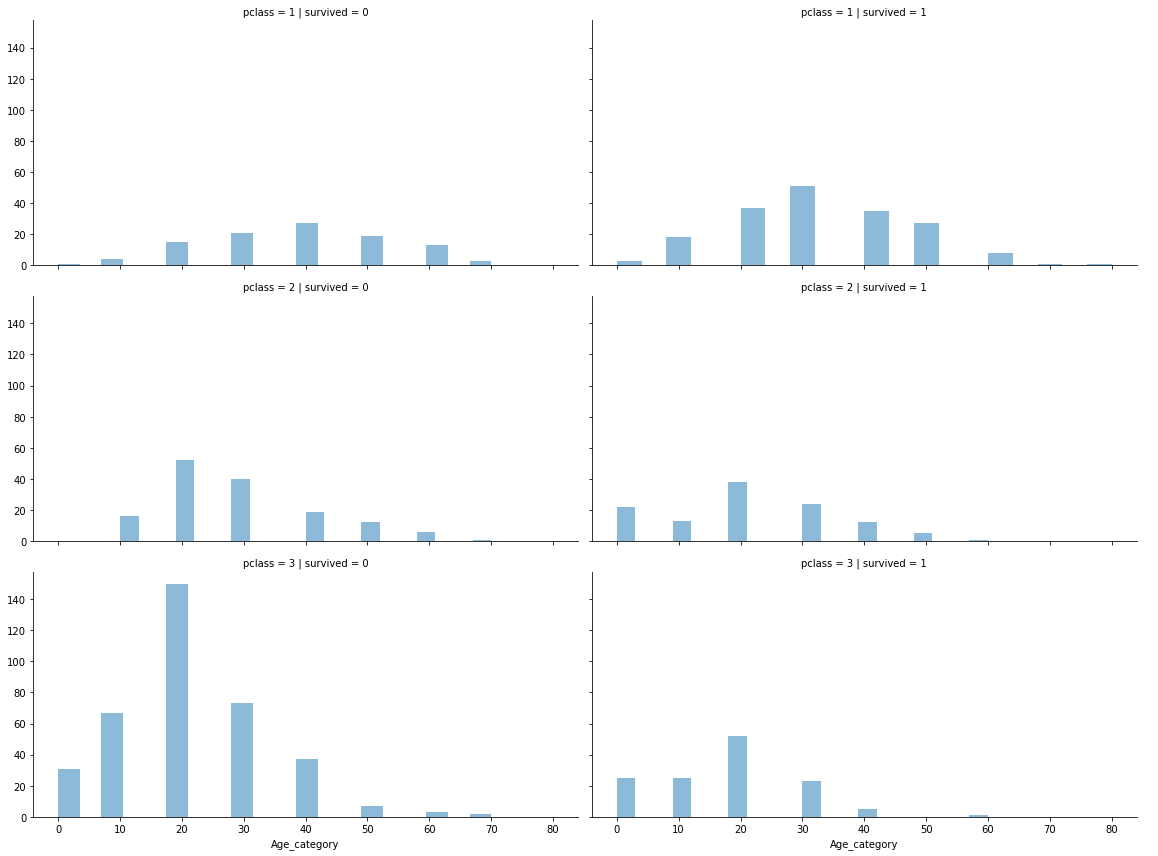

In [53]:
grid = sns.FacetGrid(titanic_df, col = 'survived', row = 'pclass', height = 4, aspect = 2)
grid.map(plt.hist, 'Age_category', alpha = .5, bins = 20)
grid.add_legend()
plt.show()

- 3등급이 가장 많이 탑승, 생존 확률 최저
- 1등급은 반 이상이 생존, 생존 확률 최고

### 나이에 따른 생존 비교

#### 나이대별 범주 설정

In [44]:
def age_category(age):
    age = (age//10)*10
    return age

In [45]:
Age_category = titanic_df.age.apply(age_category)
Age_category

0       20.0
1        0.0
2        0.0
3       30.0
4       20.0
        ... 
1304    10.0
1305     NaN
1306    20.0
1307    20.0
1308    20.0
Name: age, Length: 1309, dtype: float64

In [46]:
# 카테고리형으로 자료형 변경
Age_category = Age_category.astype('category')
Age_category

0       20.0
1        0.0
2        0.0
3       30.0
4       20.0
        ... 
1304    10.0
1305     NaN
1306    20.0
1307    20.0
1308    20.0
Name: age, Length: 1309, dtype: category
Categories (9, float64): [0.0, 10.0, 20.0, 30.0, ..., 50.0, 60.0, 70.0, 80.0]

In [47]:
# insert로 원하는 위치에 이름 지정하고 넣어주기
titanic_df.insert(4,'Age_category',Age_category)
titanic_df

,pclass,survived,sex,age,Age_category,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,20.0,0,0,211.3375,S,2
1,1,1,male,0.92,0.0,1,2,151.5500,S,11
2,1,0,female,2.00,0.0,1,2,151.5500,S,NaN
3,1,0,male,30.00,30.0,1,2,151.5500,S,NaN
4,1,0,female,25.00,20.0,1,2,151.5500,S,NaN
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.50,10.0,1,0,14.4542,C,NaN
1305,3,0,female,NaN,NaN,1,0,14.4542,C,NaN
1306,3,0,male,26.50,20.0,0,0,7.2250,C,NaN
1307,3,0,male,27.00,20.0,0,0,7.2250,C,NaN


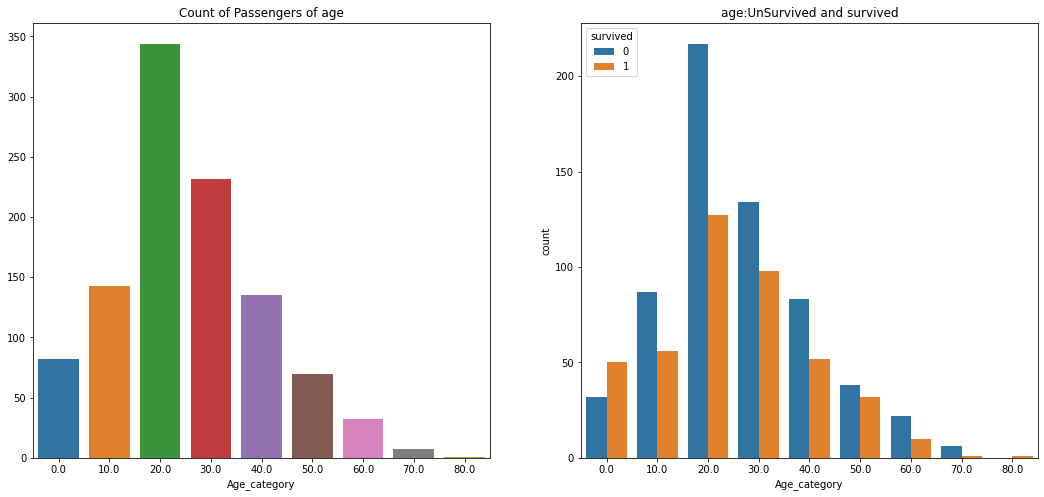

In [48]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.countplot('Age_category', data = titanic_df, ax=ax[0])
ax[0].set_title('Count of Passengers of age')
ax[0].set_ylabel('')

sns.countplot('Age_category', hue = 'survived', data = titanic_df, ax=ax[1])
ax[1].set_title('age:UnSurvived and survived')
plt.show()

- 20대가 가장 많이 탑승, 생존확률 최저
- 10세 이하 반 이상 생존, 생존확률 최고
- 노년층(60~80) 생존확률 매우매우 적음
- 30~40대도 절반 이하 생존

### 형제 자매 동반 생존 확률 분석

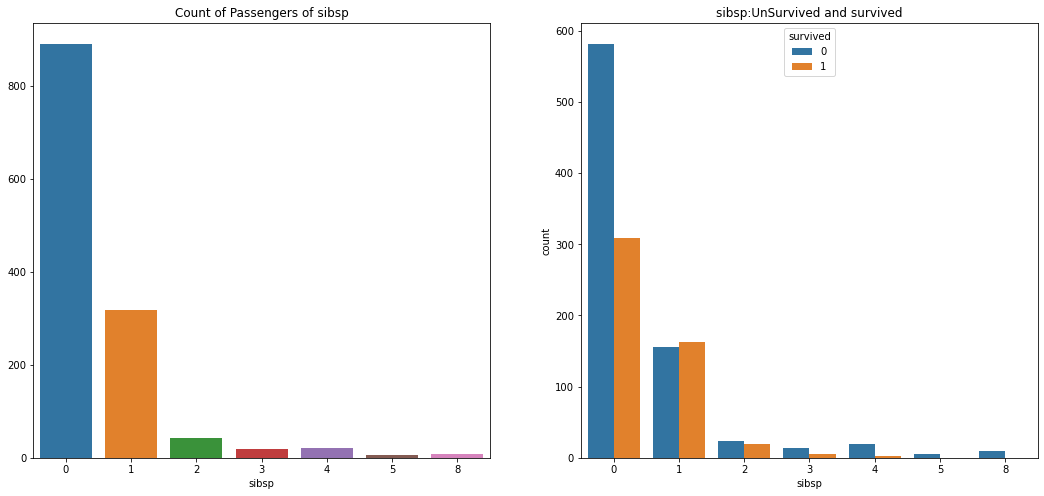

In [49]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.countplot('sibsp', data = titanic_df, ax=ax[0])
ax[0].set_title('Count of Passengers of sibsp')
ax[0].set_ylabel('')

sns.countplot('sibsp', hue = 'survived', data = titanic_df, ax=ax[1])
ax[1].set_title('sibsp:UnSurvived and survived')
plt.show()

- 형제 자매 없이 혼자 탄 사람들이 가장 많고 생존확률도 가장 낮음
- 형제 자매 1~2명 있는 사람은 반은 살고 반은 돌아가심
- 형제 자매 3명 이상은 생존확률 매우 적음

### 부모-자식 변수 생존 여부

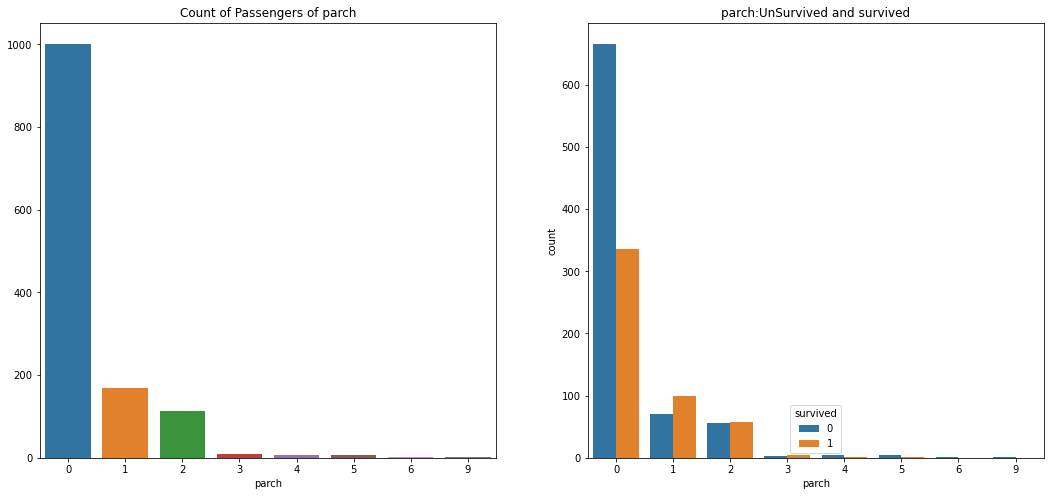

In [50]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.countplot('parch', data = titanic_df, ax=ax[0])
ax[0].set_title('Count of Passengers of parch')
ax[0].set_ylabel('')

sns.countplot('parch', hue = 'survived', data = titanic_df, ax=ax[1])
ax[1].set_title('parch:UnSurvived and survived')
plt.show()

- 부모-자식 같이 안타고 혼자 탄 사람이 가장 많음, 3명 중 2명 돌아가심. 생존확률 30%정도
- 부모-자식 1명은 생존 확률 반 이상
- 부모-자식 2~3명은 생존 확률 절반
- 4명 이상은 생존확률 적음

# 웹사이트에 쓸 타이타닉 예시

In [24]:
titanic_df = pd.read_pickle('tdf.pkl')
titanic_df.head()

,survived,fare_cat,age_cat,family,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,0,0,1,0,0,0,1
1,1,1,4,3,0,1,0,0,1
2,0,1,4,3,1,0,0,0,1
3,0,1,0,3,0,1,0,0,1
4,0,1,0,3,1,0,0,0,1


In [4]:
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_tdf = titanic_df['survived']
x_tdf = titanic_df.drop('survived',axis=1)

#학습용 데이터와 평가용 데이터를 8:2로 분리
x_train, x_test, y_train, y_test = train_test_split(x_tdf,y_tdf,test_size=0.2, random_state=11)
print(x_train.shape, x_test.shape)

(1047, 8) (262, 8)


In [8]:
titanic_df.columns

Index(['survived', 'fare_cat', 'age_cat', 'family', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [15]:
titanic_df.family.unique()

array([ 0,  3,  1,  2,  5,  4,  6,  7, 10], dtype=int64)

In [21]:
titanic_df.describe()

,survived,fare_cat,age_cat,family,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,3.109244,1.276547,0.883881,0.355997,0.644003,0.206264,0.093965,0.699771
std,0.486055,0.870594,1.340355,1.583639,0.478997,0.478997,0.404777,0.291891,0.458533
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,4.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier() # RandomForest 객체 생성
rf_model.fit(x_train,y_train) # fit : 학습
rf_pred = rf_model.predict(x_test) # predict : 예측
accuracy_rf = accuracy_score(y_test,rf_pred).round(2) # accuracy_score : 평가(실제값과 예측값으로)

lr_model = LogisticRegression() # LogisticRegression 객체 생성
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print(f'rf 정확도 : {accuracy_rf}, lr 정확도 : {accuracy_lr}')

rf 정확도 : 0.77, lr 정확도 : 0.81


In [6]:
# 모델을 파일로 저장
import pickle
import joblib

filename = 'tcl_model.pkl'
joblib.dump(lr_model,filename)

['tcl_model.pkl']

In [7]:
# 잘 들어갔는 지 불러와서 확인
mdl = joblib.load('tcl_model.pkl')
mdl

LogisticRegression()

In [12]:
data = [3,0,0,0,1,0,0,1]
df = pd.DataFrame(columns=['fare_cat', 'age_cat', 'family', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'])
df.loc[0,:] = data
y_pred = mdl.predict(df)
y_pred

array([0], dtype=int64)